In [3]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [4]:
import tenpy
import tenpy.linalg.np_conserved as npc
from tenpy.algorithms import dmrg
from tenpy.networks.mps import MPS

In [5]:
from tenpy.networks.site import SpinSite, SpinHalfSite
from tenpy.models.lattice import Chain
from tenpy.models.model import CouplingModel, NearestNeighborModel, MPOModel

In [6]:
class ClusterIsing(CouplingModel):
    def __init__(self, model_params):
        # Read out/set default parameters
        name = "Cluster Ising model"
        L = model_params.get('L', 2)
        B = model_params.get('B', 0)
        bc_MPS = model_params.get('bc_MPS', 'infinite')
        
        # sites
        site = SpinHalfSite(conserve=None)

        # lattice
        bc = 'periodic'
        lat = Chain(L, site, bc=bc, bc_MPS=bc_MPS)

        # initialize CouplingModel
        CouplingModel.__init__(self, lat)

        # add terms of the Hamiltonian
        self.add_onsite(-B, 0, 'Sigmax')
        self.add_multi_coupling(
            -1,
            [
                ('Sigmaz', -1, 0),
                ('Sigmax', 0, 0),
                ('Sigmaz', 1, 0),
            ]
        )

        # initialize H_MPO
        MPOModel.__init__(self, lat, self.calc_H_MPO())

In [7]:
model=ClusterIsing({'B': 0.5})

In [8]:
model.lat.bc

array([False])

In [10]:
model.lat.boundary_conditions

['periodic']

In [9]:
dir(model.lat)

['BZ',
 'Ls',
 'Lu',
 'N_cells',
 'N_rings',
 'N_sites',
 'N_sites_per_ring',
 '_BZ',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_asvalid_latidx',
 '_basis',
 '_keep_possible_couplings',
 '_keep_possible_multi_couplings',
 '_mps2lat_vals_idx',
 '_mps2lat_vals_idx_fix_u',
 '_mps_fix_u',
 '_order',
 '_perm',
 '_reciprocal_basis',
 '_set_Ls',
 '_strides',
 'basis',
 'bc',
 'bc_MPS',
 'bc_shift',
 'boundary_conditions',
 'copy',
 'count_neighbors',
 'coupling_shape',
 'cylinder_axis',
 'dim',
 'distance',
 'enlarge_mps_unit_cell',
 'extract_segment',
 'find_coupling_pairs',
 'from_hdf5',
 'lat2mps_idx',
 'mps2lat_idx',
 'mps2lat_values',
 'mps2lat_va

In [215]:
psi = MPS.from_desired_bond_dimension(model.lat.mps_sites(), 1, bc=model.lat.bc_MPS)

In [216]:
psi.canonical_form()

In [217]:
dmrg_params = {
    "trunc_params": {"chi_max": 8, "chi_min": 1, "svd_min": 1.e-10},
    "min_sweeps":100,
    "max_sweeps":200,
    "mixer": True,
    "combine":False,
    'decay':2,
    'amplitude':10e-1,
    'disable_after':60,
    'update_env':0
}

In [218]:
eng = dmrg.TwoSiteDMRGEngine(psi, model, dmrg_params)

/home/kieranc/Desktop/numerical_spt_classification/code/venv/lib/python3.11/site-packages/tenpy/tools/params.py:230: UserWarning: unused options for config TwoSiteDMRGEngine:
['amplitude', 'decay', 'disable_after']
  warnings.warn(msg.format(keys=sorted(unused), name=self.name))


In [219]:
e, psi = eng.run()

In [220]:
e

-1.1180339887498292

In [210]:
psi.L

2

In [211]:
print(psi.get_B(0))

<npc.Array shape=(2, 2, 2) labels=['vL', 'p', 'vR']
charge=ChargeInfo([], [])
 +1 | +1 | -1 
0 []|0 []|0 []
2   |2   |2   
[[[ 0.91758795 -0.1752437 ]
  [ 0.21661313  0.28355027]]

 [[ 0.35048741 -0.06693714]
  [-0.56710054 -0.74234424]]]
>


In [212]:
print(psi.get_B(1))

<npc.Array shape=(2, 2, 2) labels=['vL', 'p', 'vR']
charge=ChargeInfo([], [])
 +1 | +1 | -1 
0 []|0 []|0 []
2   |2   |2   
[[[-0.91758795  0.1752437 ]
  [-0.21661313 -0.28355027]]

 [[-0.35048741  0.06693714]
  [ 0.56710054  0.74234424]]]
>


In [23]:
print(eng.options)

Config, name='TwoSiteDMRGEngine', options:
{'E_tol_to_trunc': None,
 'N_sweeps_check': 1,
 'P_tol_max': 0.0001,
 'P_tol_min': 5.0000000000000005e-22,
 'P_tol_to_trunc': 0.05,
 'amplitude': 1.0,
 'chi_list': None,
 'combine': False,
 'decay': 2,
 'diag_method': 'default',
 'disable_after': 60,
 'lanczos_params': Config(<1 options>, 'lanczos_params'),
 'max_E_err': 1e-08,
 'max_N_for_ED': 400,
 'max_N_sites_per_ring': 18,
 'max_S_err': 1e-05,
 'max_hours': 8760,
 'max_sweeps': 200,
 'max_trunc_err': 0.0001,
 'min_sweeps': 100,
 'mixer': True,
 'mixer_params': Config(<3 options>, 'mixer_params'),
 'norm_tol': 1e-05,
 'norm_tol_final': 1e-10,
 'trunc_params': Config(<5 options>, 'trunc_params'),
 'update_env': 0}


In [27]:
print(eng.sweeps)

101


In [28]:
print(eng.time0)

1711552118.8437908


In [30]:
update_stats_dict = eng.update_stats

In [33]:
update_stats_dict.keys()

dict_keys(['i0', 'age', 'E_total', 'N_lanczos', 'time', 'err', 'E_trunc', 'ov_change'])

In [36]:
E_trunc_values = update_stats_dict['E_trunc']

In [38]:
type(E_trunc_values)

list

In [39]:
len(E_trunc_values)

2020

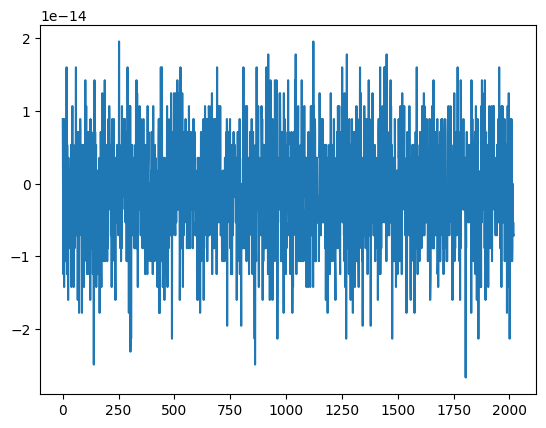

In [40]:
plt.plot(E_trunc_values)

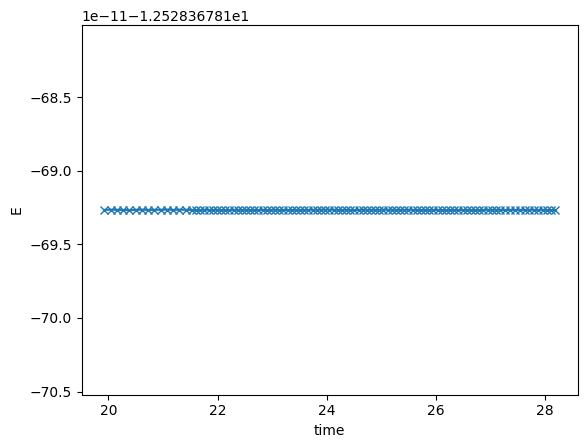

In [41]:
eng.plot_sweep_stats()

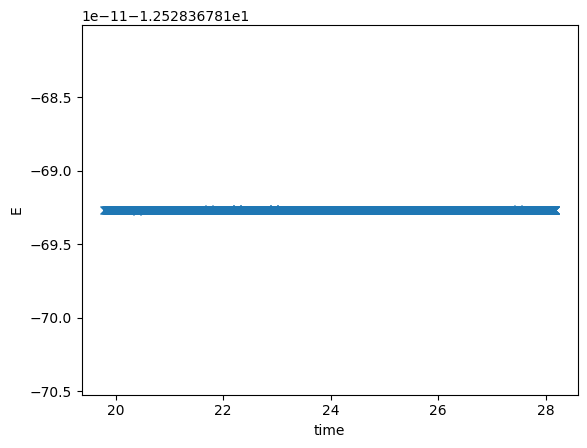

In [43]:
fig, ax = plt.subplots()
eng.plot_update_stats(ax)

In [44]:
e

-12.528367810692657

In [45]:
type(psi)

tenpy.networks.mps.MPS

In [46]:
psi.bc

'finite'

In [47]:
psi.test_sanity()

In [48]:
psi.chi

[2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2]

In [59]:
print(psi.get_B(0))

<npc.Array shape=(1, 2, 2) labels=['vL', 'p', 'vR']
charge=ChargeInfo([], [])
 +1 | +1 | -1 
0 []|0 []|0 []
1   |2   |2   
[[[ 0.7983623  -0.07931952]
  [ 0.107861    0.58710481]]]
>


In [60]:
print(psi.get_B(1))

<npc.Array shape=(2, 2, 4) labels=['vL', 'p', 'vR']
charge=ChargeInfo([], [])
 +1 | +1 | -1 
0 []|0 []|0 []
2   |2   |4   
[[[ 0.78052104  0.24187837 -0.02450266 -0.03413989]
  [ 0.28122593 -0.29778183  0.36531775  0.17116294]]

 [[ 0.26834761 -0.37284195 -0.59262961  0.18361907]
  [-0.21704333  0.43399281 -0.0203685   0.41009778]]]
>


In [49]:
print(psi.get_B(6))

<npc.Array shape=(4, 2, 4) labels=['vL', 'p', 'vR']
charge=ChargeInfo([], [])
 +1 | +1 | -1 
0 []|0 []|0 []
4   |2   |4   
[[[ 8.97295589e-01 -2.36529443e-01  7.94049212e-16 -2.12455708e-16]
  [ 1.94556536e-01  3.17902821e-01  1.81303908e-16  1.58658523e-16]]

 [[ 3.60401087e-01 -9.50026605e-02 -1.98399120e-15  2.07389444e-16]
  [-4.84390108e-01 -7.91487065e-01 -4.98976998e-16 -6.76166833e-16]]

 [[-5.53363575e-17 -2.61273027e-16 -8.97295589e-01  2.36529443e-01]
  [ 5.79773514e-16  2.12940332e-15 -1.94556536e-01 -3.17902821e-01]]

 [[-2.01547187e-16 -3.49515359e-16  3.60401087e-01 -9.50026605e-02]
  [-7.38284669e-16  5.12321268e-16 -4.84390108e-01 -7.91487065e-01]]]
>


In [50]:
psi.entanglement_entropy()

array([0.64805343, 1.22350734, 1.22350734, 1.22350734, 1.22350734,
       1.22350734, 1.22350734, 1.22350734, 1.22350734, 1.22350734,
       0.64805343])

In [51]:
psi.entanglement_spectrum()

[array([0.43229737, 1.04701565]),
 array([0.71636006, 1.55864975, 1.55864975, 2.40093945]),
 array([0.71636006, 1.55864975, 1.55864975, 2.40093945]),
 array([0.71636006, 1.55864975, 1.55864975, 2.40093945]),
 array([0.71636006, 1.55864975, 1.55864975, 2.40093945]),
 array([0.71636006, 1.55864975, 1.55864975, 2.40093945]),
 array([0.71636006, 1.55864975, 1.55864975, 2.40093945]),
 array([0.71636006, 1.55864975, 1.55864975, 2.40093945]),
 array([0.71636006, 1.55864975, 1.55864975, 2.40093945]),
 array([0.71636006, 1.55864975, 1.55864975, 2.40093945]),
 array([0.43229737, 1.04701565])]

In [54]:
print(psi.get_rho_segment([6]))

<npc.Array shape=(2, 2) labels=['p0', 'p0*']
charge=ChargeInfo([], [])
 +1 | -1 
0 []|0 []
2   |2   
[[0.64367394 0.03954329]
 [0.03954329 0.35632606]]
>


In [56]:
psi.mutinf_two_site(3)

(array([[ 0,  1],
        [ 0,  2],
        [ 0,  3],
        [ 1,  2],
        [ 1,  3],
        [ 1,  4],
        [ 2,  3],
        [ 2,  4],
        [ 2,  5],
        [ 3,  4],
        [ 3,  5],
        [ 3,  6],
        [ 4,  5],
        [ 4,  6],
        [ 4,  7],
        [ 5,  6],
        [ 5,  7],
        [ 5,  8],
        [ 6,  7],
        [ 6,  8],
        [ 6,  9],
        [ 7,  8],
        [ 7,  9],
        [ 7, 10],
        [ 8,  9],
        [ 8, 10],
        [ 8, 11],
        [ 9, 10],
        [ 9, 11],
        [10, 11]]),
 array([ 7.25995157e-02,  2.59419143e-03, -8.88178420e-16,  7.25995157e-02,
         2.59419143e-03, -1.11022302e-15,  7.25995157e-02,  2.59419143e-03,
         2.22044605e-16,  7.25995157e-02,  2.59419143e-03,  0.00000000e+00,
         7.25995157e-02,  2.59419143e-03,  0.00000000e+00,  7.25995157e-02,
         2.59419143e-03,  0.00000000e+00,  7.25995157e-02,  2.59419143e-03,
         4.44089210e-16,  7.25995157e-02,  2.59419143e-03, -2.22044605e-16,
  

In [213]:
psi.correlation_length()

0.06357462240187146

# Run basic sweep

In [279]:
dmrg_params = {
    "trunc_params": {"chi_max": 100, "chi_min": 1, "svd_min": 1.e-10},
    "min_sweeps":100,
    "max_sweeps":200,
    "mixer": True,
    "combine":False,
    'decay':2,
    'amplitude':10e-1,
    'disable_after':60,
    'update_env':0
}

In [280]:
B_params = np.linspace(0, 2, 81)

In [281]:
wavefunctions = list()
energies = list()

for B in B_params:
    model=ClusterIsing({'B': B})
    
    psi = MPS.from_desired_bond_dimension(model.lat.mps_sites(), 1, bc=model.lat.bc_MPS)
    psi.canonical_form()

    eng = dmrg.TwoSiteDMRGEngine(psi, model, dmrg_params)
    e, psi = eng.run()

    wavefunctions.append(psi)
    energies.append(e)

/home/kieranc/Desktop/numerical_spt_classification/code/venv/lib/python3.11/site-packages/tenpy/tools/params.py:230: UserWarning: unused options for config TwoSiteDMRGEngine:
['amplitude', 'decay', 'disable_after']
  warnings.warn(msg.format(keys=sorted(unused), name=self.name))
/home/kieranc/Desktop/numerical_spt_classification/code/venv/lib/python3.11/site-packages/tenpy/tools/params.py:230: UserWarning: unused options for config TwoSiteDMRGEngine:
['amplitude', 'decay', 'disable_after']
  warnings.warn(msg.format(keys=sorted(unused), name=self.name))
/home/kieranc/Desktop/numerical_spt_classification/code/venv/lib/python3.11/site-packages/tenpy/tools/params.py:230: UserWarning: unused options for config TwoSiteDMRGEngine:
['amplitude', 'decay', 'disable_after']
  warnings.warn(msg.format(keys=sorted(unused), name=self.name))
/home/kieranc/Desktop/numerical_spt_classification/code/venv/lib/python3.11/site-packages/tenpy/tools/params.py:230: UserWarning: unused options for config TwoS

# Save wavefunctions

In [300]:
psi = wavefunctions[20]

In [301]:
psi

In [5]:
import h5py
from tenpy.tools import hdf5_io

In [304]:
r"{}".format(B).replace(".", "_")

'2_0'

In [307]:
for B, psi in zip(B_params, wavefunctions):
    data = {
        "wavefunction": psi,
        "paramters": {"B": B}
    }

    filename = r"data/cluster_ising_2site_idmrg/{}".format(B).replace(".", "_")
    filename += ".h5"
    with h5py.File(filename, 'w') as f:
        hdf5_io.save_to_hdf5(f, data)

# Load data

In [6]:
import os

In [8]:
DATA_DIR = r"data/cluster_ising_2site_idmrg"

In [10]:
loaded_data = list()

for local_file_name in os.listdir(DATA_DIR):
    f_name = r"{}/{}".format(DATA_DIR, local_file_name)
    with h5py.File(f_name, 'r') as f:
        data = hdf5_io.load_from_hdf5(f)
        loaded_data.append(data)

In [12]:
loaded_data[0]

{'paramters': {'B': 1.175},
 'wavefunction': <tenpy.networks.mps.MPS at 0x70a5e71d7150>}

In [13]:
B_params = sorted(d['paramters']['B'] for d in loaded_data)

In [16]:
B_params[::10]

[0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0]

In [19]:
wavefunctions = list()

for b in B_params:
    wf = next(d['wavefunction'] for d in loaded_data if d['paramters']['B'] == b)
    wavefunctions.append(wf)

In [21]:
psi = wavefunctions[10]

In [23]:
psi.expectation_value_multi_sites(['Sigmax', 'Id']*4, 0)

array(0.00108191)

In [24]:
psi.expectation_value_multi_sites(['Sigmax',] + ['Sigmax', 'Id']*10 + ['Sigmax',], 0)

array(5.1274367e-09)

In [37]:
string_order_parameters_X_X1 = list()

for psi in wavefunctions:
    so = psi.expectation_value_multi_sites(['Sigmax',] + ['Sigmax', 'Id']*100 + ['Sigmax',], 0)
    string_order_parameters_X_X1.append(so)

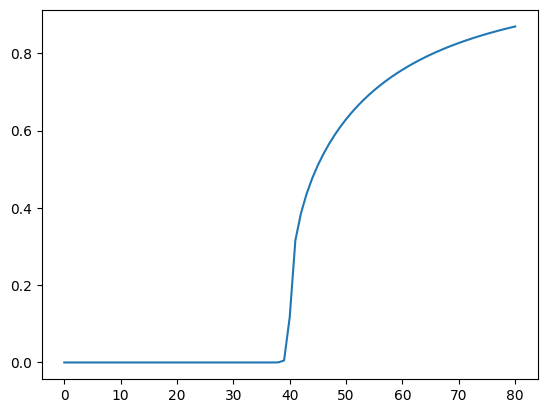

In [38]:
plt.plot(string_order_parameters_X_X1)

In [29]:
string_order_parameters_X_X2 = list()

for psi in wavefunctions:
    so = psi.expectation_value_multi_sites(['Sigmax',] + ['Id', 'Sigmax']*20 + ['Sigmax',], 0)
    string_order_parameters_X_X2.append(so)

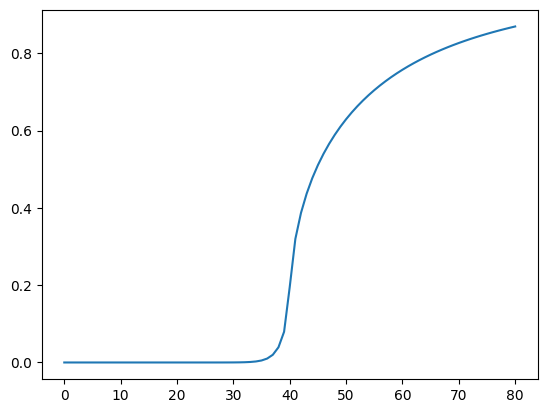

In [30]:
plt.plot(string_order_parameters_X_X2)

In [31]:
string_order_parameters_Z_X1 = list()

for psi in wavefunctions:
    so = psi.expectation_value_multi_sites(['Sigmaz',] + ['Sigmax', 'Id']*20 + ['Sigmaz',], 0)
    string_order_parameters_Z_X1.append(so)

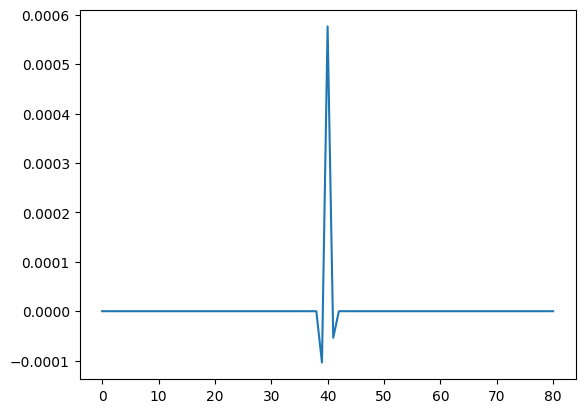

In [32]:
plt.plot(string_order_parameters_Z_X1)

In [33]:
string_order_parameters_Z_X2 = list()

for psi in wavefunctions:
    so = psi.expectation_value_multi_sites(['Sigmaz',] + ['Id', 'Sigmax']*20 + ['Sigmaz',], 0)
    string_order_parameters_Z_X2.append(so)

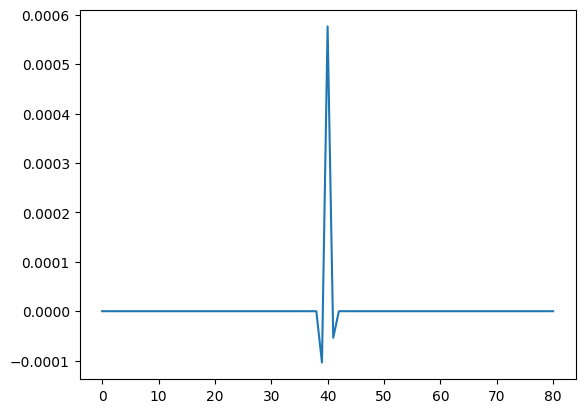

In [34]:
plt.plot(string_order_parameters_Z_X1)

In [39]:
string_order_parameters_Y_X1 = list()

for psi in wavefunctions:
    so = psi.expectation_value_multi_sites(['Sigmay',] + ['Sigmax', 'Id']*20 + ['Sigmay',], 0)
    string_order_parameters_Y_X1.append(so)

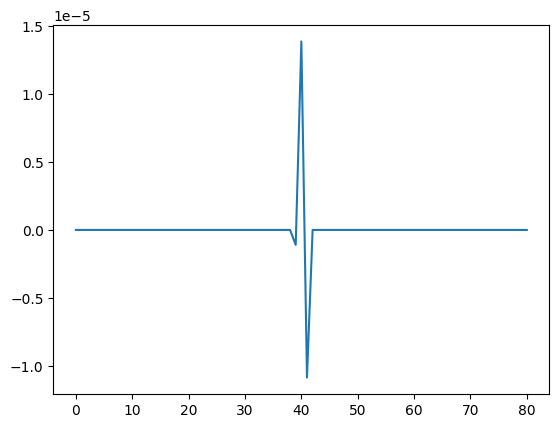

In [40]:
plt.plot(string_order_parameters_Y_X1)

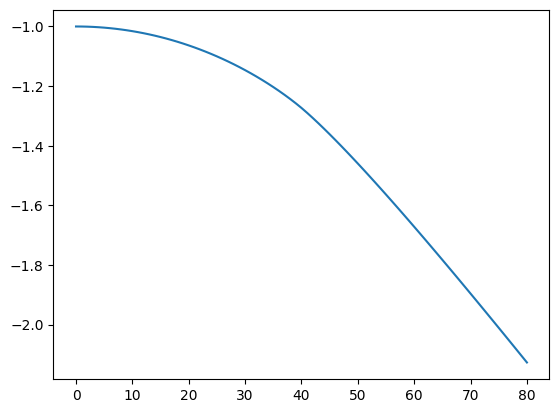

In [282]:
plt.plot(energies)

In [283]:
correlation_lengths = [psi.correlation_length() for psi in wavefunctions]

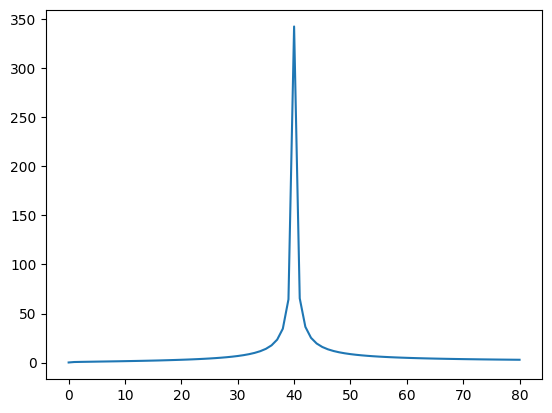

In [284]:
plt.plot(correlation_lengths)

In [285]:
sigma_z_expectations = [
    psi.expectation_value('Sigmaz')[0] for psi in wavefunctions
]

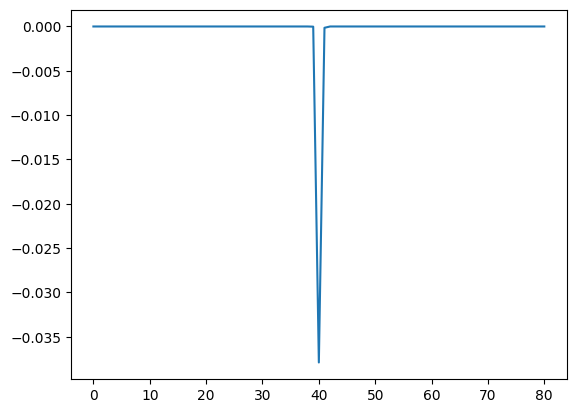

In [286]:
plt.plot(sigma_z_expectations)

In [287]:
sigma_x_expectations = [
    psi.expectation_value('Sigmax')[0] for psi in wavefunctions
]

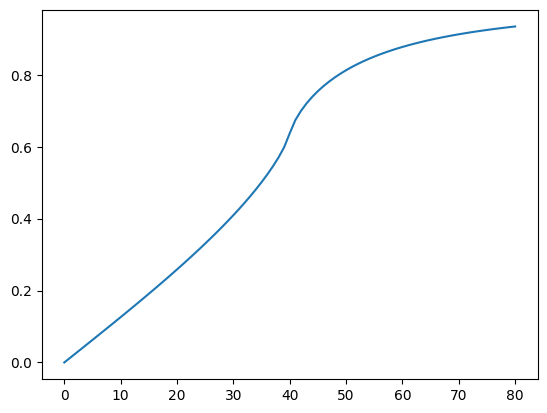

In [288]:
plt.plot(sigma_x_expectations)

Write a function to automate this degeneracy checking.

In [293]:
def is_entanglement_spectrum_degenerate(psi, tol=0.01):
    spectrum = psi.entanglement_spectrum()[0]
    dominant_value = spectrum.min()
    num_dominant_values = ((spectrum < (dominant_value + tol)).sum()).astype('int')

    assert num_dominant_values >=1
    
    return (num_dominant_values > 1)

In [295]:
is_entanglement_spectrum_degenerate(wavefunctions[60])

False

In [296]:
is_entanglement_spectrum_degenerate(wavefunctions[20])

True

In [297]:
degenerate_spectra = [
    is_entanglement_spectrum_degenerate(psi)
    for psi in wavefunctions
]

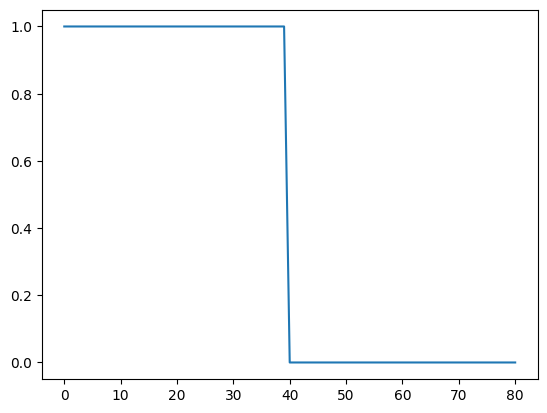

In [299]:
plt.plot([int(x) for x in degenerate_spectra])